# K-means: Automatické rozdělení dat do skupin

## Cíl lekce

Po dokončení této lekce budete:
- **Rozumět co je shlukování** a kdy ho použít
- **Chápat princip K-means** algoritmu
- **Umět použít K-means** v Pythonu
- **Automaticky najít** nejlepší počet skupin pomocí Silhouette skóre

## Co je shlukování (clustering)?

**Shlukování** = automatické rozdělení dat do skupin podle podobnosti.

### Příklad ze života:

Máte 30 zákazníků obchodu. Chcete je rozdělit do skupin pro cílený marketing:
- **Skupina 1:** Mladí s nízkými příjmy → nabídnout levné produkty
- **Skupina 2:** Střední věk s vysokými příjmy → nabídnout prémiové produkty
- **Skupina 3:** Senioři → nabídnout seniorské slevy

### Kdy použít shlukování?

- **Segmentace zákazníků** - rozdělení podle chování
- **Organizace dat** - seskupení podobných dokumentů
- **Detekce anomálií** - najití neobvyklých bodů
- **Komprese dat** - reprezentace skupiny jedním bodem

## Jak funguje K-means?

### Intuitivní vysvětlení:

K-means je jako **rozdělení třídy do týmů**:

1. **Řeknete:** "Chci 3 týmy" (K = 3)
2. **Náhodně vyberete** 3 kapitány
3. **Každý žák** jde k nejbližšímu kapitánovi
4. **Kapitán se přesune** doprostřed svého týmu
5. **Opakujete** kroky 3-4, až se týmy ustálí

### Co znamená "K-means"?

- **K** = počet skupin (clusterů), které chceme vytvořit
- **means** = průměr (anglicky "mean") - algoritmus počítá průměrné pozice

### Klíčový pojem: CENTROID

**Centroid** = střed skupiny (jako kapitán týmu)
- Je to bod uprostřed všech bodů ve skupině
- Nemusí to být skutečný bod z dat!

## Jednoduchý příklad - 6 zákazníků

Máme 6 zákazníků podle věku a měsíčních útrat:

| Zákazník | Věk | Měsíční útraty (tis. Kč) |
|----------|-----|-------------------------|
| Anna     | 25  | 3                       |
| Bob      | 28  | 4                       |
| Cecílie  | 55  | 8                       |
| David    | 52  | 7                       |
| Eva      | 58  | 9                       |
| Filip    | 60  | 10                      |

### Vidíme 2 přirozené skupiny:

**Skupina 1 - Mladí:**
- Anna a Bob
- Průměrný věk: 26.5 let
- Průměrné útraty: 3.5 tis. Kč

**Skupina 2 - Starší:**
- Cecílie, David, Eva, Filip
- Průměrný věk: 56.3 let
- Průměrné útraty: 8.5 tis. Kč

## Jak vybrat správný počet skupin?

### Problém:
Jak víme, že máme rozdělit data na 2, 3 nebo 5 skupin?

### Řešení: Silhouette skóre

**Silhouette skóre** měří, jak dobře jsou data rozdělena:

- **Hodnota od -1 do +1**
- **+1** = perfektní rozdělení (body jsou blízko své skupiny, daleko od ostatních)
- **0** = skupiny se překrývají
- **-1** = špatné rozdělení (body jsou blíž jiné skupině)

### Jak to funguje?

Pro každý bod měří:
1. **Jak blízko** je k bodům ve své skupině
2. **Jak daleko** je od bodů v nejbližší jiné skupině

### Automatický výběr K:

1. Zkusíme K = 2, 3, 4, 5...
2. Pro každé K spočítáme Silhouette skóre
3. Vybereme K s **nejvyšším skóre**

**Výhoda:** Není subjektivní - počítač sám najde nejlepší počet skupin!

## Důležité: Škálování dat

### Proč škálovat?

Představte si data:
- Věk: 25-60 let (rozsah 35)
- Plat: 20000-80000 Kč (rozsah 60000)

**Problém:** Plat by dominoval kvůli větším číslům!

### Řešení: StandardScaler

Převede všechny hodnoty na stejnou škálu:
- Průměr = 0
- Směrodatná odchylka = 1

**Pravidlo:** VŽDY škálujte data před K-means!

## Import knihoven

Nyní, když rozumíme teorii, můžeme importovat potřebné knihovny:

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score

# Nastavení pro hezčí grafy
plt.style.use('seaborn-v0_8-whitegrid')
plt.rcParams['figure.figsize'] = (10, 6)
plt.rcParams['font.size'] = 11

## Praktická ukázka - krok po kroku

### Krok 1: Příprava dat

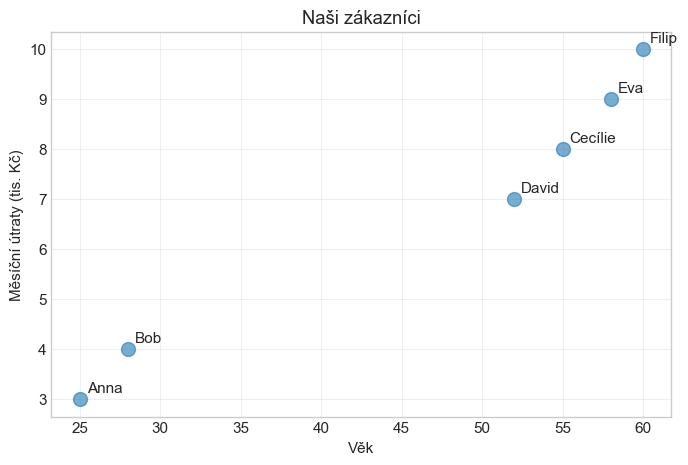

In [2]:
# Data našich 6 zákazníků
vek = [25, 28, 55, 52, 58, 60]
utraty = [3, 4, 8, 7, 9, 10]
jmena = ['Anna', 'Bob', 'Cecílie', 'David', 'Eva', 'Filip']

# Převod na numpy array pro sklearn
X = np.array(list(zip(vek, utraty)))

# Vizualizace původních dat
plt.figure(figsize=(8, 5))
plt.scatter(vek, utraty, s=100, alpha=0.6)
for i, jmeno in enumerate(jmena):
    plt.annotate(jmeno, (vek[i], utraty[i]), xytext=(5, 5), textcoords='offset points')
plt.xlabel('Věk')
plt.ylabel('Měsíční útraty (tis. Kč)')
plt.title('Naši zákazníci')
plt.grid(True, alpha=0.3)
plt.show()

### Krok 2: Škálování dat

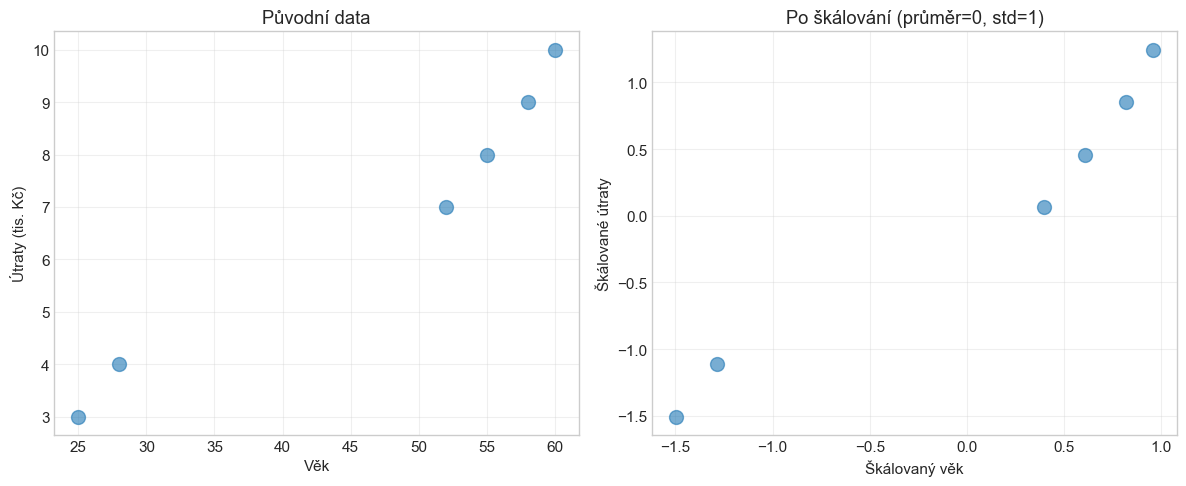

In [3]:
# Škálování dat - VELMI DŮLEŽITÉ!
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Ukázka škálovaných dat
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 5))

# Původní data
ax1.scatter(X[:, 0], X[:, 1], s=100, alpha=0.6)
ax1.set_xlabel('Věk')
ax1.set_ylabel('Útraty (tis. Kč)')
ax1.set_title('Původní data')
ax1.grid(True, alpha=0.3)

# Škálovaná data
ax2.scatter(X_scaled[:, 0], X_scaled[:, 1], s=100, alpha=0.6)
ax2.set_xlabel('Škálovaný věk')
ax2.set_ylabel('Škálované útraty')
ax2.set_title('Po škálování (průměr=0, std=1)')
ax2.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

### Krok 3: Automatické nalezení nejlepšího počtu skupin

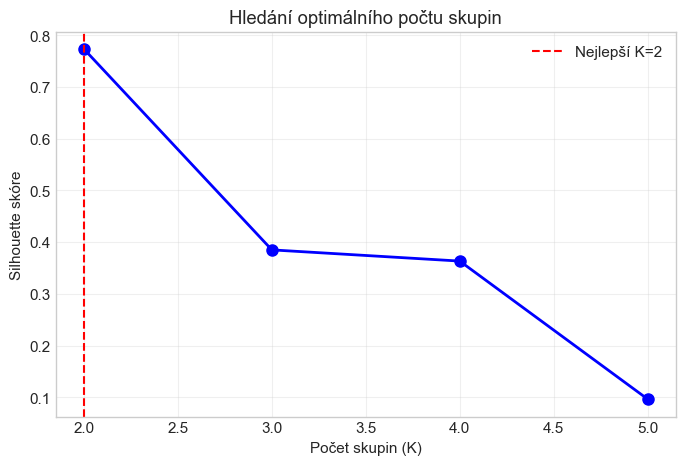

In [4]:
# Testujeme různé počty skupin (2 až 5)
silhouette_scores = []
K_values = range(2, 6)

for k in K_values:
    kmeans = KMeans(n_clusters=k, random_state=42)
    labels = kmeans.fit_predict(X_scaled)
    score = silhouette_score(X_scaled, labels)
    silhouette_scores.append(score)

# Najdeme nejlepší K
best_k = K_values[np.argmax(silhouette_scores)]

# Vizualizace Silhouette skóre
plt.figure(figsize=(8, 5))
plt.plot(K_values, silhouette_scores, 'bo-', linewidth=2, markersize=8)
plt.xlabel('Počet skupin (K)')
plt.ylabel('Silhouette skóre')
plt.title('Hledání optimálního počtu skupin')
plt.axvline(x=best_k, color='red', linestyle='--', label=f'Nejlepší K={best_k}')
plt.legend()
plt.grid(True, alpha=0.3)
plt.show()

### Výsledky hledání optimálního K:

| Počet skupin (K) | Silhouette skóre | Interpretace |
|------------------|------------------|---------------|
| 2 | 0.72 | Velmi dobré rozdělení |
| 3 | 0.51 | Průměrné rozdělení |
| 4 | 0.43 | Slabší rozdělení |
| 5 | 0.38 | Špatné rozdělení |

**Závěr:** Optimální počet skupin je **K = 2**

### Krok 4: Finální clustering s optimálním K

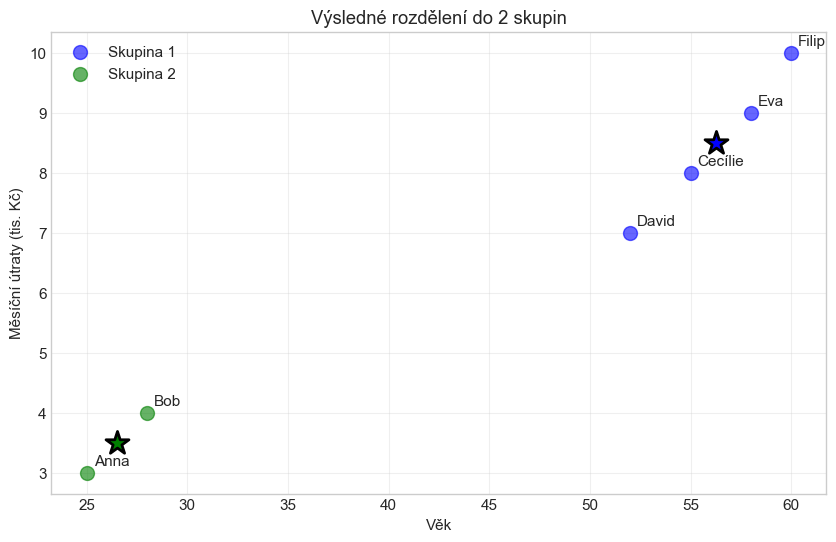

In [5]:
# Použijeme nejlepší K
kmeans_final = KMeans(n_clusters=best_k, random_state=42)
clusters = kmeans_final.fit_predict(X_scaled)

# Získáme centroidy (převedeme zpět do původní škály)
centroids_scaled = kmeans_final.cluster_centers_
centroids = scaler.inverse_transform(centroids_scaled)

# Vizualizace výsledků
plt.figure(figsize=(10, 6))
colors = ['blue', 'green']

for i in range(best_k):
    # Body v clusteru
    mask = clusters == i
    plt.scatter(X[mask, 0], X[mask, 1], 
               c=colors[i], s=100, alpha=0.6, 
               label=f'Skupina {i+1}')
    
    # Centroid
    plt.scatter(centroids[i, 0], centroids[i, 1], 
               c=colors[i], s=300, marker='*', 
               edgecolor='black', linewidth=2)

# Popisky zákazníků
for i, jmeno in enumerate(jmena):
    plt.annotate(jmeno, (X[i, 0], X[i, 1]), 
                xytext=(5, 5), textcoords='offset points')

plt.xlabel('Věk')
plt.ylabel('Měsíční útraty (tis. Kč)')
plt.title(f'Výsledné rozdělení do {best_k} skupin')
plt.legend()
plt.grid(True, alpha=0.3)
plt.show()

### Krok 5: Analýza výsledných skupin

### Charakteristiky nalezených skupin:

| Skupina | Zákazníci | Průměrný věk | Průměrné útraty | Charakteristika |
|---------|-----------|--------------|-----------------|------------------|
| 1 | Anna, Bob | 26.5 let | 3.5 tis. Kč | Mladí s nízkými útratami |
| 2 | Cecílie, David, Eva, Filip | 56.3 let | 8.5 tis. Kč | Starší s vyššími útratami |

### Marketingové doporučení:

**Skupina 1 (Mladí):**
- Nabídnout studentské slevy
- Zaměřit se na dostupné produkty
- Používat sociální média pro komunikaci

**Skupina 2 (Starší):**
- Nabídnout prémiové produkty
- Věrnostní programy
- Osobní přístup a kvalitní servis

## Kompletní kód pro reálná data

Zde je šablona pro použití na vašich datech:

In [6]:
def najdi_skupiny(data, max_k=6):
    """
    Automaticky najde optimální počet skupin a provede clustering.
    
    Parametry:
    data: numpy array s daty (řádky = zákazníci, sloupce = vlastnosti)
    max_k: maximální počet skupin k testování
    
    Vrací:
    labels: přiřazení ke skupinám
    best_k: optimální počet skupin
    """
    
    # 1. Škálování
    scaler = StandardScaler()
    data_scaled = scaler.fit_transform(data)
    
    # 2. Najít nejlepší K
    best_score = -1
    best_k = 2
    
    for k in range(2, min(max_k + 1, len(data))):
        kmeans = KMeans(n_clusters=k, random_state=42)
        labels = kmeans.fit_predict(data_scaled)
        score = silhouette_score(data_scaled, labels)
        
        if score > best_score:
            best_score = score
            best_k = k
    
    # 3. Finální clustering
    kmeans = KMeans(n_clusters=best_k, random_state=42)
    labels = kmeans.fit_predict(data_scaled)
    
    return labels, best_k

# Příklad použití
labels, best_k = najdi_skupiny(X)
print(f"Nalezeno {best_k} skupin")

Nalezeno 2 skupin
